In [133]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
train = pd.read_csv(os.path.join('C:\\Users\\michael.clawson\\Desktop\School\\Machine Learning\\Titanic\\train.csv'))
test = pd.read_csv(os.path.join('C:\\Users\\michael.clawson\\Desktop\School\\Machine Learning\\Titanic\\test.csv'))

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [136]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We see in here that we are dealing with a rather complete dataset, barring a couple of values, specifically age and cabin number. Additionally, there are several parts of our dataframe that are likely not terribly useful. For example, there is little chance that the ticket number would correspond to survival rates, outside of how it relates to where the cabin is located. Let us now look at the survival rate of the training dataset:

In [137]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

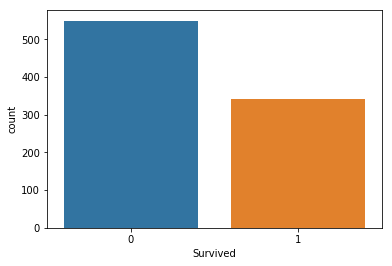

In [138]:
sns.countplot(train['Survived'])

Let us now examine the Pclass variable: this will be categorical, and a higher-class ticket correlates quite highly with elevated rates of survival.

In [139]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

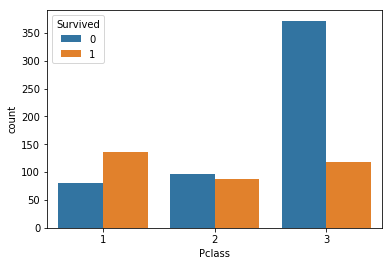

In [140]:
sns.countplot(train['Pclass'], hue=train['Survived'])


The Name variable is not very useful at first glance, however it may prove interesting to separate the titles associated with those names.

In [141]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Ms.            1
the            1
Don.           1
Lady.          1
Sir.           1
Jonkheer.      1
Capt.          1
Mme.           1
Name: Name_Title, dtype: int64

In [142]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

It is possible to see that this new variable, a partial amalgam of age and gender, shows what we would expect: Being a woman or a child makes one much more likely to survive. Also, at the time those of higher socioeconomic status generally had longer names than those in the lower classes. We see this correlation below:

In [143]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [144]:
pd.qcut(train['Name_Len'],5).value_counts()


(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

Sex is a very useful metric in this dataset, and as expected, women were much more likely to survive.

In [145]:
train['Sex'].value_counts(normalize=True)
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

We now want to fill in with the age of the null values, but first it is interesting to note that those with no age listed were not as likely to survive as those with ages in the dataset.

In [146]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

At first glance it seems that age had little to do with survival.

In [147]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [148]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

Sibsp (Number of siblings/spouses) shows a spurious relationship at best, except where more family members and siblings could be a proxy here for lower socioeconomic status.

In [149]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [150]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Parch's (Number of parents and children) relationship with survival is about as tenuous as Sibsp.

In [151]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [152]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Parch and Sibsp seem less useful as of right now, but we'll return to these later and see what we can do with them.

The Ticket variable is not terribly useful on the surface, but given the high amount of null values for cabin, it may be possible to extrapolate to some degree where a passenger was given a room from their ticket number. For this initial overview, let's examine the amount of characters in the ticket and the beginning letter of the ticket.

In [153]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [154]:
train.groupby(['Ticket_Len'])['Survived'].mean()

Ticket_Len
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

In [155]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [156]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

Fare should be rather similar to the results we find for Class when we compare them to our key survival metric.

In [157]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [158]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [159]:
pd.crosstab(pd.qcut(train['Fare'], 3), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 8.662]",6,6,296
"(8.662, 26.0]",6,139,143
"(26.0, 512.329]",204,39,52


As expected, the Class and Fare variables are highly correlated.

The Cabin variable has by far the largest amount of null values, but let's see if we can't find a relationship between the exsiting Cabin numbers and the tickets.

In [160]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [161]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [162]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [163]:
pd.qcut(train['Cabin_num'],3).value_counts()

(65.667, 148.0]     67
(1.999, 28.667]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [164]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [165]:
train['Survived'].corr(train['Cabin_num'])

-0.063845959227893712

Cabin number does not seem terribly indicative of survival, as indicated by the slightly less than zero correlation.

The Embarked variable shows that those who boarded at Cherbourg were more likely to survive, like because they were upper-class passengers. See attached link: https://www.encyclopedia-titanica.org/titanic-passengers-crew-embarked/2/cherbourg.html About half of the embarkees at Cherbourg were first class passengers, more than at any other port.

In [166]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

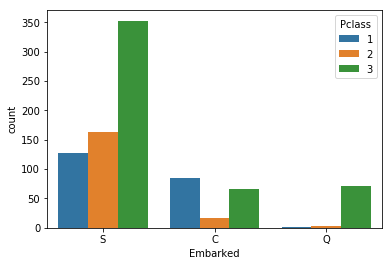

In [167]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

MODEL PREP

We first will want two columns: Passenger's name length, and passenger's title.

In [168]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

Now, we can fill in the null ages with the mean corresponding to the row's class and title. This allows for a more realistic approach than just filling the overall column's mean.

In [169]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

While the Sibsp and Parch variables are rather weak indicators, let's combine them into a stronger one and create smaller buckets to put them in than just dummy variables for all combinations.

In [170]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

This function allows us to split the Ticket column into ticket_lett and ticket_len, for reasons outlined above.

In [171]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

We do the same thing with the Cabin variable, but for cabin letter and number:

In [172]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [173]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

We will resort to filling null values in Embarked with the most common port, Southampton.

In [174]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

Since one of the test set fares is missing, that will be filled with the mean of the training set.

In [175]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

Dummy variables must now be created for all of our categorical columns:

In [176]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

For modelling purposes, we'll drop the Passenger ID variable, as it should have nothing to do with our prediction in the first place.

In [177]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test


In [178]:
train = pd.read_csv(os.path.join('C:\\Users\\michael.clawson\\Desktop\School\\Machine Learning\\Titanic\\train.csv'))
test = pd.read_csv(os.path.join('C:\\Users\\michael.clawson\\Desktop\School\\Machine Learning\\Titanic\\test.csv'))
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)

In [179]:
print(len(train.columns))

45


Now we have a 44-variable model, with all nulls imputed and all dummies separated.

Now that we have our data prepped and ready to go, let's search correct hyper parameters for a random forest:

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(train.iloc[:, 1:], train.iloc[:, 0])

print(gs.best_score_)
print(gs.best_params_)
print(gs.cv_results_)

0.838383838384
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 700}
{'mean_fit_time': array([ 0.25167918,  0.57233151,  1.97179977,  2.88771025,  5.52701807,
        0.48067427,  0.6514682 ,  1.91481773,  3.79853272,  6.23159226,
        0.59692351,  0.73168604,  2.05879418,  3.13455963,  4.68415634,
        0.25217851,  0.67431196,  1.93187253,  2.81750512,  4.25201829,
        0.24367277,  0.73885886,  1.74840673,  2.93424924,  4.65573144,
        0.39227843,  0.52755054,  1.6625127 ,  2.76295988,  4.09807412,
        0.23883637,  0.59208711,  1.68302735,  3.00213003,  4.16795746,
        0.24467413,  0.61226781,  1.60447359,  2.81017113,  4.28404363,
        0.23833593,  0.51753394,  1.93203823,  2.9519275 ,  4.25221205,
        0.25268118,  0.75304834,  1.71037992,  2.75712268,  4.18597039,
        0.27202638,  0.44181315,  2.16286755,  2.60267981,  3.96281163,
        0.23983622,  0.40361945,  1.86425702,  2.78447652,  4.34641719,
        0.26

Our optimal parameters lie inside the hyperparameter specifications we outlined, so we can be confident that no further exploration will be required. 

Now we can fit our model with the hyperparameters outlined above:

In [181]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


That's a pretty good out of bag score, so now let's see what were the most important determinants in our model:

In [182]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
12,Sex_female,0.111215
11,Sex_male,0.109769
33,Name_Title_Mr.,0.109746
1,Fare,0.088209
2,Name_Len,0.087904
0,Age,0.078651
8,Pclass_3,0.043268
35,Name_Title_Miss.,0.031292
7,Ticket_Len,0.031079
34,Name_Title_Mrs.,0.028852


In [183]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv(os.path.join('C:\\Users\\michael.clawson\\Desktop\School\\Machine Learning\\Titanic\\test.csv'))
predictions = pd.concat([test.iloc[:, 0], predictions], axis = 1)
predictions.to_csv('C:\\Users\\michael.clawson\\Desktop\School\\Machine Learning\\Titanic\\Titanic_Kaggle_Submission.csv', sep=",", index = False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\michael.clawson\\Desktop\\School\\Machine Learning\\Titanic\\Titanic_Kaggle_Submission.csv'